# Horse or Human 人马识别

数据集：https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip

问题：二分类图像识别

说明：
>包含了名为horse和human两个文件夹，包含了两种图片，分别是马和人的图片  
>每种图片大约500张，每个图片大小是300x300，每个像素3byte

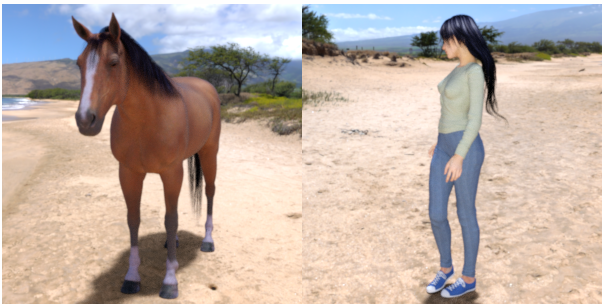

# 1.建立项目文件夹并导入数据

## 建立项目文件夹
>代码.ipython  
>文件夹test--存放测试用图片  
>文件夹horse-or-human
>>文件夹horses--存放图片  
>>文件夹humans--存放图片


---


# 2.查看数据
### 1.添加图片路径
>import os  
>>路径变量_dir = os.path.join('图片主文件夹路径')

### 2.查看图片名称与图片数量
>**将文件夹内全部放入列表：** 变量 = os.listdir(路径变量_dir)  
>**查看文件名:** print(变量[])  
>**查看文件数量:** print(len(os.listdir(路径变量_dir)))

### 3.画出图片并检查数据
>from PIL import Image    
>>图片变量名 = Image.open(图片路径)

>import matplotlib.pyplot as plt 
>>设置画板样式：plt.subplot(共几行,共几列,第几个图片) 
>>画板上放置图片：plt.imshow(图片变量名)
>>显示画板：plt.show()

In [ ]:
import os

#将图片所在文件夹加入至路径 dir = os.path.join('文件夹路径')

# horse图片数据 训练文件所在路径
train_horse_dir = os.path.join('./horse-or-human/horses')
# human图片数据 训练文件所在路径
train_human_dir = os.path.join('./horse-or-human/humans')


In [ ]:
# 得到文件夹下所有文件名称 os.listdir(文件夹路径)
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

#确认一下每种图片的数量
print('马图片数量:', len(os.listdir(train_horse_dir)))
print('人图片数量:', len(os.listdir(train_human_dir)))

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# 图片路径 路径为train_horse_dir文件夹名+图片文件名
img1_dir = os.path.join(train_horse_dir,train_horse_names[0])
img2_dir = os.path.join(train_human_dir,train_human_names[0])

# Image包打开图片 Image.open(图片路径)
img1 = Image.open(img1_dir)
img2 = Image.open(img2_dir)

# 设置plt画板样式 plt.subplot(共几行,共几列,第几个图片)
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)

# 显示
plt.show()

# 3.创建神经网络模型

### 1.创建序列模型 model = Sequential() 
### 2.模型添加层 add(层(神经元, input_dim=输入维度, activation='激活函数')) 
### 3.查看模型 print(model.summary())

---


#### CNN卷积神经网络
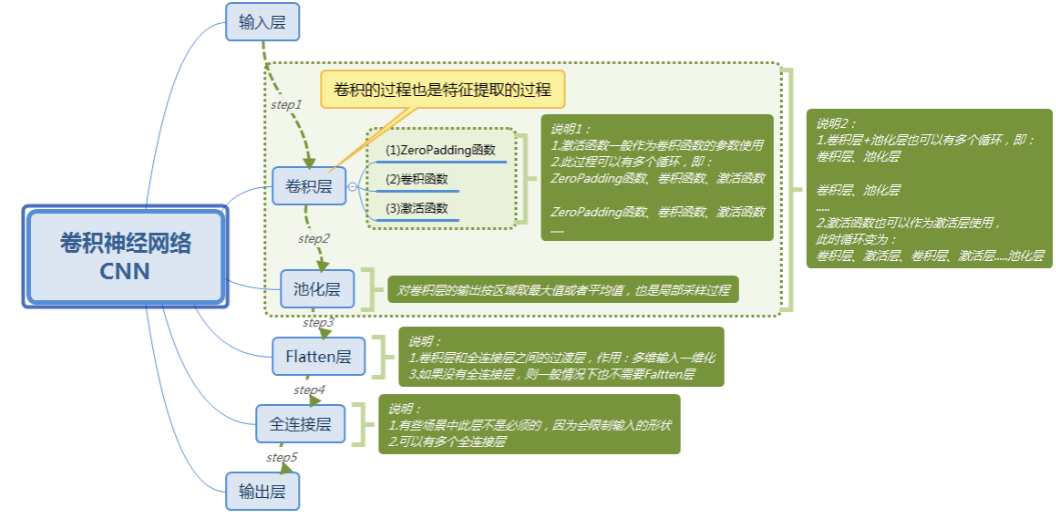


#### 卷积层 
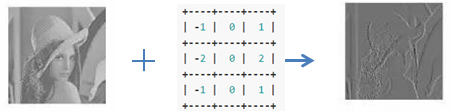
>设置卷积权重
>>weights = [[ [ [[-1]], [[0]], [[1]] ],[ [[-2]], [[0]], [[2]] ],[ [[-1]], [[0]], [[1]] ] ]]  
>>weights =np.array(weights)  

>添加卷积层
>>model.add(Conv2D(滤波器数, (3,3), activation='relu', input_shape=(300,300,3)))  
>>model.set_weights(weights)


#### 池化层 MaxPooling2D(2,2)
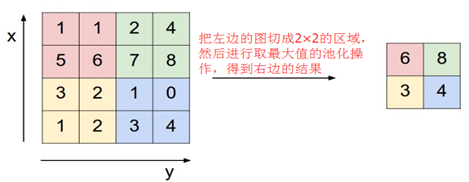


In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential #模型
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten #层

# 创建序列模型
model = Sequential()

# 添加layer层 add(模型(参数))
# 输入层 输入图像(300,300,3)

# 第一个隐藏层 卷积池化 
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3))) #选择3*3大小滤镜扫描图片
model.add(MaxPooling2D(2,2)) #选择2*2大小池化层压缩图片

# 第二个隐藏层 卷积池化 
model.add(Conv2D(32, (3,3), activation='relu')) #选择3*3大小滤镜扫描图片
model.add(MaxPooling2D(2,2)) #选择2*2大小池化层压缩图片

# 第三个隐藏层 卷积池化 
model.add(Conv2D(64, (3,3), activation='relu')) #选择3*3大小滤镜扫描图片
model.add(MaxPooling2D(2,2)) #选择2*2大小池化层压缩图片

# 第四个隐藏层 卷积池化 
model.add(Conv2D(64, (3,3), activation='relu')) #选择3*3大小滤镜扫描图片
model.add(MaxPooling2D(2,2)) #选择2*2大小池化层压缩图片

# 第五个隐藏层 卷积池化 
model.add(Conv2D(64, (3,3), activation='relu')) #选择3*3大小滤镜扫描图片
model.add(MaxPooling2D(2,2)) #选择2*2大小池化层压缩图片


# 将图片数据压成一维数据
model.add(Flatten())

#第六个隐藏层 全连接层
model.add(Dense(512, activation='relu'))

# 输出层，有1个神经元，它的值将是0或者1,0代表horse,1代表human
model.add(Dense(1, activation='sigmoid'))  


# 4.数据预处理

为文件夹内图片打上文件夹标签

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 所有图片像素点都被除以255，让数值回到0-1区间，便于计算
train_datagen = ImageDataGenerator(rescale=1/255)

#为图片分配标签
# 使用train_datagen 产生 128批量的图片训练流
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # 训练数据所在目录 images
        target_size=(300, 300),  #
        batch_size=128,          # 每次批量128个
        # 由于使用交叉熵代价函数或者叫损失函数，是个二分类的问题
        class_mode='binary')    

# 5.编译模型及训练模型
### 1.编译：确定优化器和损失函数 
>model.compile(optimizer='优化器' , loss='损失函数' , metrics=['监控指标'])

### 2.训练：确定训练的数据、轮数、每次训练样本数 
>model.fit(训练数据, 训练标签, epochs=训练回合数, batch_size=每次训练给的数据量)

### 3.保存：保存训练的模型
>model.save('模型.h5')

### 4.验证：查看测试集上预测效果
>test_loss, test_acc = model.evaluate(测试集, 测试标签)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
#由于是个二分类的问题，一般选用交叉熵代价函数或者损失函数
#学习速度（learning rate, lr）为0.001
#使用accuracy(acc)准确度来度量
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
#训练模型
model.fit_generator(train_generator, steps_per_epoch=8, epochs=10, verbose=1)

#保存模型
model.save('human_model.h5')

# 5.预测

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

img1 = image.load_img('test/ren4.jpg', target_size=(300, 300))
img1 = image.img_to_array(img1)

img2 = image.load_img('test/ma2.jpg', target_size=(300, 300))
img2 = image.img_to_array(img2)

#img1 = img1.reshape(1,300,300,3)
#img2 = img2.reshape(1,300,300,3)

image = np.stack((img1,img2),0)


print(image)

model = load_model('human_model.h5')
pre = model.predict(image)

print(pre)

[[[[187. 191. 202.]
   [196. 201. 207.]
   [196. 201. 204.]
   ...
   [142. 152. 153.]
   [133. 151. 155.]
   [138. 156. 160.]]

  [[189. 193. 204.]
   [197. 202. 208.]
   [196. 201. 204.]
   ...
   [141. 153. 153.]
   [155. 166. 162.]
   [143. 154. 150.]]

  [[190. 194. 205.]
   [196. 201. 207.]
   [193. 198. 201.]
   ...
   [171. 182. 184.]
   [189. 194. 188.]
   [203. 208. 202.]]

  ...

  [[ 35.  33.  34.]
   [ 34.  32.  33.]
   [ 33.  31.  32.]
   ...
   [183. 141. 143.]
   [180. 178. 199.]
   [128. 129. 150.]]

  [[ 33.  31.  32.]
   [ 33.  31.  32.]
   [ 32.  30.  31.]
   ...
   [210. 181. 185.]
   [ 77.  75.  89.]
   [ 60.  58.  72.]]

  [[ 32.  30.  31.]
   [ 31.  29.  30.]
   [ 31.  29.  30.]
   ...
   [ 84.  69.  72.]
   [ 60.  60.  68.]
   [ 51.  52.  57.]]]


 [[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
 